In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv("iris.csv")
data.columns = ["Sepal Length","Sepal Width","Petal Length","Petal Width","species"]

In [14]:
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [15]:
# data = load_iris()

In [16]:
# df = pd.DataFrame(data.data,columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])
# df["species"] = data.target


In [17]:
df = data

<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Width'>

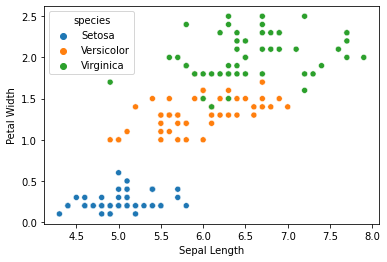

In [18]:
sns.scatterplot(data=df,x='Sepal Length',y='Petal Width',hue='species')

<AxesSubplot:xlabel='species', ylabel='Petal Width'>

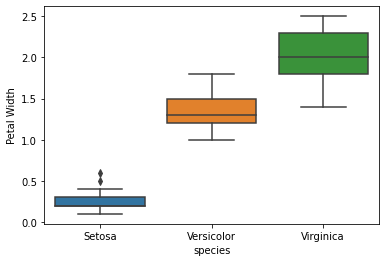

In [19]:
sns.boxplot(x="species", y="Petal Width", data=df)

In [20]:
X = df[['Sepal Length','Petal Width']]

<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Width'>

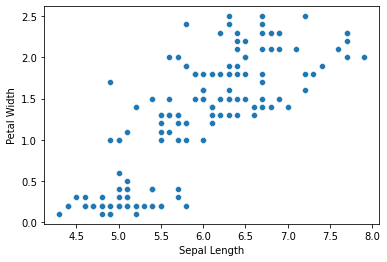

In [21]:
sns.scatterplot(x=X['Sepal Length'],y=X['Petal Width'])

In [22]:
def find_closest_centroids(X,centroids):
    n = len(X)
    k = len(centroids)
    index = np.zeros(n)
    for i in range(0,n):
        distances = []
        for j in range(0,k):

            dist = np.linalg.norm(X[i] - centroids[j]) 
            distances.append(dist)
        index[i] = np.argmin(distances)

    return index
            
            

In [23]:
initial_centroids = np.array([[3,1], [1,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X.values, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0. 0. 0.]


In [24]:
idx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       2., 0., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
       0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0.])

In [29]:
def compute_centroid(X,index,K):
    centroids = np.zeros((K,X.shape[1]))   
    for k in range(0,K):
        cluster = X[index == k]
        centroids[k] = np.mean(cluster,axis=0)
    return centroids    

In [33]:
def run_kmeans(X,initial_centroids,max_iter=10):
    K = initial_centroids.shape[0]
    index = np.zeros(X.shape[0])
    centroids = initial_centroids
    
    for i in range(max_iter):
        index=find_closest_centroids(X,centroids)
        centroids=compute_centroid(X,index,K)
    
    return index,centroids
        
        

In [34]:
initial_centroids = np.array([[5.0,0.3],[6.5,1.5],[7.8,2.4]])

In [38]:
index,centroids=run_kmeans(X.values,initial_centroids)

In [39]:
index,centroids

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        1., 2., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 2., 1.,
        2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
        1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
        2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.]),
 array([[5.00555556, 0.3037037 ],
        [5.89259259, 1.46296296],
        [6.85714286, 2.01190476]]))

In [36]:
X

,Sepal Length,Petal Width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


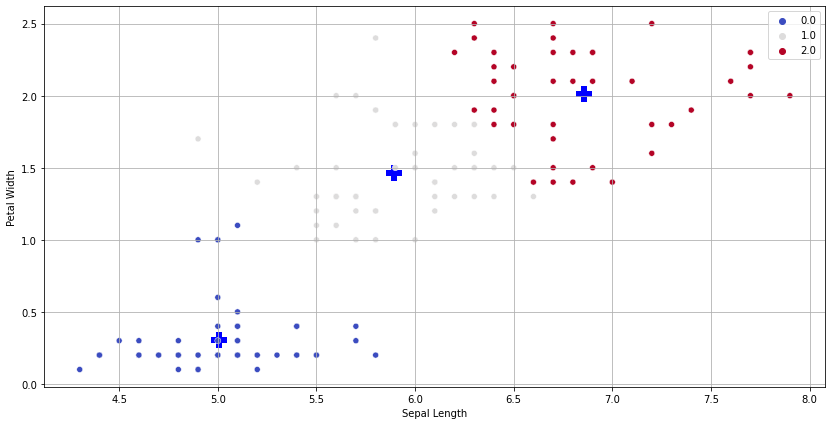

In [62]:
plt.figure(figsize=(14,7))
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="+",c='b',linewidth=16)
sns.scatterplot(data=X,x="Sepal Length",y="Petal Width",hue=index,palette="coolwarm")
plt.grid()
plt.savefig("K-Means_iris")